In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, RepeatVector
from keras.preprocessing.text import Tokenizer
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.sequence import pad_sequences
from keras.models import load_model
from keras import optimizers
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [0]:
file = open('/content/drive/My Drive/App/Machine Translation/deu-eng/deu.txt',encoding='utf-8')
data = file.read()

In [0]:
data = data.lower()

In [8]:
data[:1000]

"hi.\thallo!\nhi.\tgrüß gott!\nrun!\tlauf!\nwow!\tpotzdonner!\nwow!\tdonnerwetter!\nfire!\tfeuer!\nhelp!\thilfe!\nhelp!\tzu hülf!\nstop!\tstopp!\nwait!\twarte!\ngo on.\tmach weiter.\nhello!\thallo!\ni ran.\tich rannte.\ni see.\tich verstehe.\ni see.\taha.\ni try.\tich probiere es.\ni won!\tich hab gewonnen!\ni won!\tich habe gewonnen!\nsmile.\tlächeln!\ncheers!\tzum wohl!\nfreeze!\tkeine bewegung!\nfreeze!\tstehenbleiben!\ngot it?\tkapiert?\ngot it?\tverstanden?\ngot it?\teinverstanden?\nhe ran.\ter rannte.\nhe ran.\ter lief.\nhop in.\tmach mit!\nhug me.\tdrück mich!\nhug me.\tnimm mich in den arm!\nhug me.\tumarme mich!\ni fell.\tich fiel.\ni fell.\tich fiel hin.\ni fell.\tich stürzte.\ni fell.\tich bin hingefallen.\ni fell.\tich bin gestürzt.\ni know.\tich weiß.\ni lied.\tich habe gelogen.\ni lost.\tich habe verloren.\ni paid.\tich habe bezahlt.\ni paid.\tich zahlte.\ni swim.\tich schwimme.\ni'm 19.\tich bin 19 jahre alt.\ni'm 19.\tich bin 19.\ni'm ok.\tmir geht's gut.\ni'm ok.\tes g

In [0]:
arr = list()
for line in data.split('\n'):
  string = line.split('\t')
  arr.append(string)

In [10]:
arr

[['hi.', 'hallo!'],
 ['hi.', 'grüß gott!'],
 ['run!', 'lauf!'],
 ['wow!', 'potzdonner!'],
 ['wow!', 'donnerwetter!'],
 ['fire!', 'feuer!'],
 ['help!', 'hilfe!'],
 ['help!', 'zu hülf!'],
 ['stop!', 'stopp!'],
 ['wait!', 'warte!'],
 ['go on.', 'mach weiter.'],
 ['hello!', 'hallo!'],
 ['i ran.', 'ich rannte.'],
 ['i see.', 'ich verstehe.'],
 ['i see.', 'aha.'],
 ['i try.', 'ich probiere es.'],
 ['i won!', 'ich hab gewonnen!'],
 ['i won!', 'ich habe gewonnen!'],
 ['smile.', 'lächeln!'],
 ['cheers!', 'zum wohl!'],
 ['freeze!', 'keine bewegung!'],
 ['freeze!', 'stehenbleiben!'],
 ['got it?', 'kapiert?'],
 ['got it?', 'verstanden?'],
 ['got it?', 'einverstanden?'],
 ['he ran.', 'er rannte.'],
 ['he ran.', 'er lief.'],
 ['hop in.', 'mach mit!'],
 ['hug me.', 'drück mich!'],
 ['hug me.', 'nimm mich in den arm!'],
 ['hug me.', 'umarme mich!'],
 ['i fell.', 'ich fiel.'],
 ['i fell.', 'ich fiel hin.'],
 ['i fell.', 'ich stürzte.'],
 ['i fell.', 'ich bin hingefallen.'],
 ['i fell.', 'ich bin gestür

In [11]:
import string
import re

# Remove punctuation

for i in range(len(arr)-1):
  arr[i][0] = arr[i][0].translate(str.maketrans('', '', string.punctuation))
  arr[i][1] = arr[i][1].translate(str.maketrans('', '', string.punctuation))

arr

[['hi', 'hallo'],
 ['hi', 'grüß gott'],
 ['run', 'lauf'],
 ['wow', 'potzdonner'],
 ['wow', 'donnerwetter'],
 ['fire', 'feuer'],
 ['help', 'hilfe'],
 ['help', 'zu hülf'],
 ['stop', 'stopp'],
 ['wait', 'warte'],
 ['go on', 'mach weiter'],
 ['hello', 'hallo'],
 ['i ran', 'ich rannte'],
 ['i see', 'ich verstehe'],
 ['i see', 'aha'],
 ['i try', 'ich probiere es'],
 ['i won', 'ich hab gewonnen'],
 ['i won', 'ich habe gewonnen'],
 ['smile', 'lächeln'],
 ['cheers', 'zum wohl'],
 ['freeze', 'keine bewegung'],
 ['freeze', 'stehenbleiben'],
 ['got it', 'kapiert'],
 ['got it', 'verstanden'],
 ['got it', 'einverstanden'],
 ['he ran', 'er rannte'],
 ['he ran', 'er lief'],
 ['hop in', 'mach mit'],
 ['hug me', 'drück mich'],
 ['hug me', 'nimm mich in den arm'],
 ['hug me', 'umarme mich'],
 ['i fell', 'ich fiel'],
 ['i fell', 'ich fiel hin'],
 ['i fell', 'ich stürzte'],
 ['i fell', 'ich bin hingefallen'],
 ['i fell', 'ich bin gestürzt'],
 ['i know', 'ich weiß'],
 ['i lied', 'ich habe gelogen'],
 ['i lo

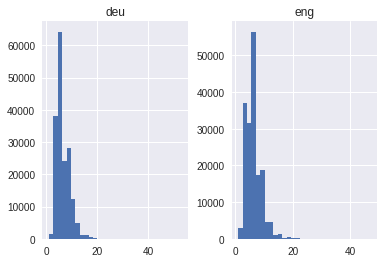

In [12]:
# empty lists
eng_l = []
deu_l = []

# populate the lists with sentence lengths
for i in range(len(arr) - 1):
      eng_l.append(len(arr[i][0].split(' ')))

for i in range(len(arr) - 1):
      deu_l.append(len(arr[i][1].split(' ')))

length_df = pd.DataFrame({'eng':eng_l, 'deu':deu_l})

length_df.hist(bins = 30)
plt.show()

In [13]:
max(np.array(length_df)[:,0])

53

In [0]:
# function to build a tokenizer
def tokenization(lines):
      tokenizer = Tokenizer()
      tokenizer.fit_on_texts(lines)
      return tokenizer

In [0]:
arr = pd.DataFrame(arr)

In [0]:
arr = np.array(arr)

In [17]:
arr.shape

(176693, 2)

In [0]:
#removing last entry because, it seems to be problematic

arr = arr[:-1,:]

In [19]:
arr.shape

(176692, 2)

In [20]:
# prepare english tokenizer
eng_tokenizer = tokenization(arr[:, 0])
eng_vocab_size = len(eng_tokenizer.word_index) + 1

eng_length = 20
print('English Vocabulary Size: %d' % eng_vocab_size)

English Vocabulary Size: 15833


In [21]:
# prepare Deutch tokenizer
deu_tokenizer = tokenization(arr[:, 1])
deu_vocab_size = len(deu_tokenizer.word_index) + 1

deu_length = 20
print('Deutch Vocabulary Size: %d' % deu_vocab_size)

Deutch Vocabulary Size: 33930


In [0]:
# encode and pad sequences
def encode_sequences(tokenizer, length, lines):
  # integer encode sequences
  seq = tokenizer.texts_to_sequences(lines)
  # pad sequences with 0 values
  seq = pad_sequences(seq, maxlen=length, padding='post')
  return seq

In [0]:
from sklearn.model_selection import train_test_split

# split data into train and test set
train, test = train_test_split(arr, test_size=0.2, random_state = 77)

In [0]:
# prepare training data
trainX = encode_sequences(deu_tokenizer, deu_length, train[:, 1])
trainY = encode_sequences(eng_tokenizer, eng_length, train[:, 0])

# prepare validation data
testX = encode_sequences(deu_tokenizer, deu_length, test[:, 1])
testY = encode_sequences(eng_tokenizer, eng_length, test[:, 0])

In [0]:
# build NMT model
def define_model(in_vocab,out_vocab, in_timesteps,out_timesteps,units):
  model = Sequential()
  model.add(Embedding(in_vocab, units, input_length=in_timesteps, mask_zero=True))
  model.add(LSTM(units))
  model.add(RepeatVector(out_timesteps))
  model.add(LSTM(units, return_sequences=True))
  model.add(Dense(out_vocab, activation='softmax'))
  return model

In [39]:
# model compilation
model = define_model(deu_vocab_size, eng_vocab_size, deu_length, eng_length, 512)

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
rms = optimizers.RMSprop(lr=0.001)
model.compile(optimizer=rms, loss='sparse_categorical_crossentropy')

In [41]:
filename = '/content/drive/My Drive/App/Machine Translation/deu-eng/model'
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

# train model
history = model.fit(trainX, trainY.reshape(trainY.shape[0], trainY.shape[1], 1),
                    epochs=30, batch_size=512, validation_split = 0.2,callbacks=[checkpoint], 
                    verbose=1)

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Train on 113082 samples, validate on 28271 samples
Epoch 1/30
113082/113082 [==============================] - 224s 2ms/step - loss: 2.3248 - val_loss: 2.0525

Epoch 00001: val_loss improved from inf to 2.05252, saving model to /content/drive/My Drive/App/Machine Translation/deu-eng/model
Epoch 2/30
113082/113082 [==============================] - 216s 2ms/step - loss: 1.9584 - val_loss: 1.8719

Epoch 00002: val_loss improved from 2.05252 to 1.87192, saving model to /content/drive/My Drive/App/Machine Translation/deu-eng/model
Epoch 3/30
113082/113082 [==============================] - 218s 2ms/step - loss: 1.7788 - val_loss: 1.7195

Epoch 00003: val_loss improved from 1.87192 to 1.71951, saving model to /content/drive/My Drive/App/Machine Translation/deu-eng/model
Epoch 4/30
113082/113082 [==============================] - 217s 2ms/step - loss: 1.6215 - val_los

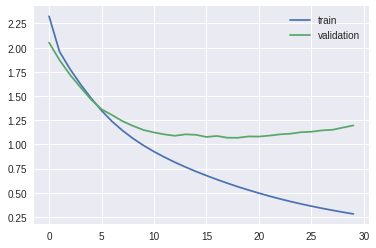

In [42]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','validation'])
plt.show()

In [4]:
model = load_model('/content/drive/My Drive/App/Machine Translation/deu-eng/model')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


In [26]:
testX

array([[   1,  268,    3, ...,    0,    0,    0],
       [ 675,    6,    2, ...,    0,    0,    0],
       [  37,   50,   49, ...,    0,    0,    0],
       ...,
       [   6, 1689, 1381, ...,    0,    0,    0],
       [  11,   14,    9, ...,    0,    0,    0],
       [1353,    1, 8979, ...,    0,    0,    0]], dtype=int32)

In [28]:
np.array(testX).shape

(35339, 20)

In [30]:
len(testX[0])

20

In [0]:
def get_word(n, tokenizer):
  for word, index in tokenizer.word_index.items():
    if index == n:
      return word
  return None

In [93]:
for i in range(len(testX[76])):
  t = get_word(testX[76][i], deu_tokenizer)
  print(t)

wie
macht
er
das
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


In [0]:
pred = model.predict_classes(np.array(testX[76]).reshape(-1,20))

In [95]:
pred

array([[ 39, 120,   9,  12,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0]])

In [0]:
pred = np.array(pred)

In [97]:
len(pred[0])

20

In [98]:
for i in range(len(pred[0])):
  t = get_word(pred[0][i], eng_tokenizer)
  print(t)

how
does
he
do
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


In [0]:
preds = model.predict_classes(testX[0,:].reshape((testX.shape[0],testX.shape[1])))